# Predicting House Sale Prices

In this project we will be build a machine learning model based on linear regression method and try to improve it.

Our data is collection of houses features from city Ames, Iowa, United States from 2006 to 2010.The dataset contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

Lets start.


In [1]:
#import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns

In [2]:
#open the data

data = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
#create the required functions

def transform_features(dframe):
    return dframe

def select_features(dframe):
    return dframe[['Gr Liv Area', 'SalePrice']]

def train_and_test(dframe):
    train = dframe[:1460]
    test = dframe[1460:]
    
    train_num = train.select_dtypes(include=['integer', 'float']) 
    test_num = test.select_dtypes(include=['integer', 'float']) 
    features = train_num.columns.drop('SalePrice')
    
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    prediction = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], prediction)
    rmse = np.sqrt(mse)
    return rmse

In [4]:
#make a first step

transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse

57088.25161263909

### Featuring Engineering

First and more careful stage is data preparation. On this level we need to clean the data, decide what we'll do with null values, drop them or fill, and chose the right features which can make our model more precise.

For the beginning we find the columns with the null values and drop the columns with more than 5% of missing values.

In [5]:
miss_values = data.isnull().sum()
miss_values.sort_values(ascending=False).head(10)

Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Fireplace Qu     1422
Lot Frontage      490
Garage Qual       159
Garage Yr Blt     159
Garage Cond       159
Garage Finish     159
dtype: int64

In [6]:
# drop the columns with more than 5% of missing values
columns_with_nulls = miss_values[(miss_values > (data.shape[0] *0.05))]
data = data.drop(columns_with_nulls.index, axis = 1)
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [7]:
#find the other numeric missing values and prepare dictionary for filling

num_cols = data.select_dtypes(include=['integer', 'float']).isnull().sum()
num_cols_index = num_cols[num_cols > 0].index
fill_values = data[num_cols_index].mode().to_dict(orient='records')[0]
fill_values

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [8]:
#fill the missing numeric values
data = data.fillna(fill_values)
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


Then we find the text columns with missing values and drop them all.

In [9]:
#find the text columns with missing values

text_values = data.select_dtypes(include=['object']).isnull().sum()
text_values_index = text_values[text_values!=0].index

In [10]:
#drop them
data = data.drop(text_values_index, axis=1)
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


In the end drop the columns which havent useful meaning for machine learning and check the date columns.

In [11]:
#drop the useless columns

data = data.drop(['PID', 'Order','Mo Sold', 'Sale Condition', 'Sale Type'], axis=1)

In [12]:
#check the date columms

data['Yr Sold'].value_counts()

2007    694
2009    648
2006    625
2008    622
2010    341
Name: Yr Sold, dtype: int64

In [13]:
data['Year Built'].value_counts().sort_index(ascending=False).head()

2010      3
2009     25
2008     49
2007    109
2006    138
Name: Year Built, dtype: int64

In [14]:
data['Year Remod/Add'].value_counts().sort_index(ascending=False).head()

2010     13
2009     34
2008     81
2007    164
2006    202
Name: Year Remod/Add, dtype: int64

Check the different between years, cause we dont use in our model houses with false information - if houses sold before they was built or remod, their features can't contain useful truly information.

In [15]:
#create the new columns

data['years_before_sales'] = data['Yr Sold'] - data['Year Built']
data['years_since_remod'] = data['Yr Sold'] - data['Year Remod/Add']

In [16]:
data[data['years_before_sales']<0]

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,years_before_sales,years_since_remod
2180,20,RL,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,...,484,0,0,0,0,17000,2007,183850,-1,-2


In [17]:
data[data['years_since_remod']<0]

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,years_before_sales,years_since_remod
1702,60,RL,16659,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,...,368,0,0,0,0,0,2007,260116,0,-1
2180,20,RL,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,...,484,0,0,0,0,17000,2007,183850,-1,-2
2181,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,...,406,0,0,0,0,0,2007,184750,0,-1


In [18]:
#drop this rows
data = data.drop([1702, 2180, 2181], axis=0)

#drop date columns with 'pure' values
data = data.drop(['Year Built', 'Year Remod/Add'], axis=1)

In [19]:
data.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,years_before_sales,years_since_remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,62,0,0,0,0,0,2010,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,2010,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,2010,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,2010,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,2010,189900,13,12


Now let's check the cleaned and prepared dataset on the ready-made functions.

In [20]:
#insert the current dataset

transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse

55275.36731241307

### Feature Selection

Now to find the lowest Root Mean Square Error we have to select the appropriate features.

We start our exploration from numeric columns. For that we choose only numeric columns, find the correlation between them and SalePrice column, after that drop the features with weak correlation (for this we set the bound of correlation equal 0.3).

In [21]:
#generate the correlation table

numeric_data = data.select_dtypes(include=['integer', 'float'])

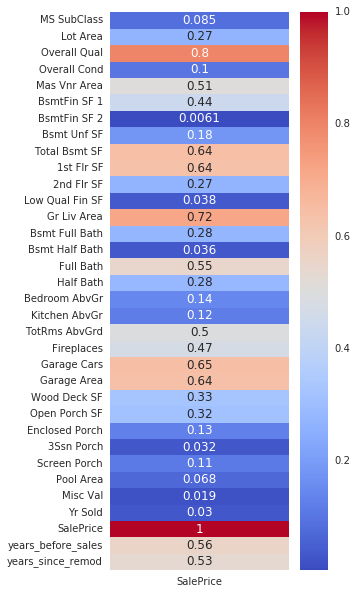

In [22]:
#view the correlation with SalePrice column by creating the heatmap

saleprice_corr = numeric_data.corr().loc[:, ['SalePrice']].abs()
plt.figure(figsize = (4,10))
sns.heatmap(saleprice_corr, annot=True, cmap= 'coolwarm')

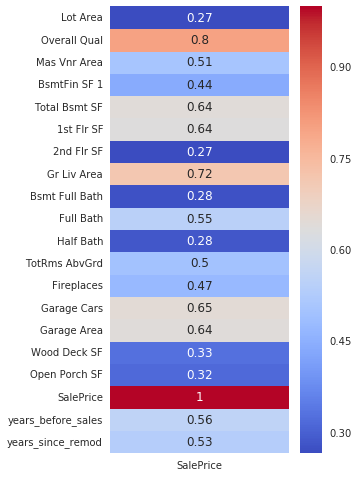

In [23]:
#drop the features with weak correlation and make another heatmap

plt.figure(figsize=(4,8))
sns.heatmap(saleprice_corr[saleprice_corr>0.25].dropna(), annot=True, cmap='coolwarm')

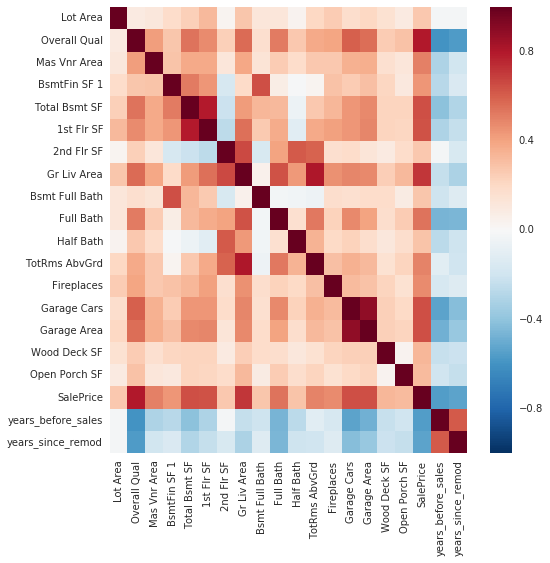

In [24]:
#create heatmap with correlation between other columns

saleprice_corr_norm = saleprice_corr[saleprice_corr > 0.25].dropna()
plt.figure(figsize=(8,8))
sns.heatmap(data[saleprice_corr_norm.index].corr())

Among these features we can see strong correlation between:

* **Total Bsmt SF** and **1st Flr SF**
* **Gr Liv Area** and **TotRms AbvGrd**
* **Garage Area** and **Garage Cars**

Because Gr Liv Area, Garage Area and Total Bsmt SF are they look like a feature with a lot of specifics, let's drop the others columns: 1st Flr SF, TotRms AbvGrd and Garage Cars.

In [25]:
#drop the columns from data

saleprice_corr_drop = saleprice_corr[saleprice_corr < 0.25].dropna()
data = data.drop(saleprice_corr_drop.index, axis=1)
data = data.drop(['1st Flr SF', 'TotRms AbvGrd', 'Garage Cars'], axis=1)
data.head()

,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,SalePrice,years_before_sales,years_since_remod
0,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,2,528.0,P,210,62,215000,50,50
1,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,0,730.0,Y,140,0,105000,49,49
2,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,0,312.0,Y,393,36,172000,52,52
3,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,2,522.0,Y,0,0,244000,42,42
4,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,1,482.0,Y,212,34,189900,13,12


In [26]:
data.columns

Index(['MS Zoning', 'Lot Area', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'BsmtFin SF 1',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Kitchen Qual', 'Functional', 'Fireplaces', 'Garage Area',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'SalePrice',
       'years_before_sales', 'years_since_remod'],
      dtype='object')

Next step from Feature Selection is finding a more convenient categorical features.


In [27]:
# create a list of column names from documentation that are *meant* to be categorical

nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [28]:
#looking for the remaining columns in the dataset

cat_cols = []
for col in nominal_features:
    if col in data.columns:
        cat_cols.append(col)

cat_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [29]:
#find columns with more than 10 different values

drop_cat_cols = []
for i in cat_cols:
    if data[i].value_counts().count() > 10:
        drop_cat_cols.append(i)
        
drop_cat_cols

['Neighborhood', 'Exterior 1st', 'Exterior 2nd']

In [30]:
#drop previous finding columns

cat_cols = np.setdiff1d(cat_cols, drop_cat_cols)
data = data.drop(drop_cat_cols, axis=1)
data.head()

,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,...,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,SalePrice,years_before_sales,years_since_remod
0,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,TA,Typ,2,528.0,P,210,62,215000,50,50
1,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,...,TA,Typ,0,730.0,Y,140,0,105000,49,49
2,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,Gd,Typ,0,312.0,Y,393,36,172000,52,52
3,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,Ex,Typ,2,522.0,Y,0,0,244000,42,42
4,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,TA,Typ,1,482.0,Y,212,34,189900,13,12


In [31]:
#choose only object-type columns

text_cols = data.select_dtypes(include='object')
text_cols.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive'],
      dtype='object')

In [32]:
#turning the object-type columns in category type

for i in text_cols:
        data[i] = data[i].astype('category')
        
data = pd.concat([data, pd.get_dummies(data.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)

In [33]:
data.head()

,Lot Area,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,31770,6,112.0,639.0,1080.0,0,1656,1.0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,11622,5,0.0,468.0,882.0,0,896,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,14267,6,108.0,923.0,1329.0,0,1329,0.0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,11160,7,0.0,1065.0,2110.0,0,2110,1.0,2,1,...,0,0,0,0,0,0,1,0,0,1
4,13830,5,0.0,791.0,928.0,701,1629,0.0,2,1,...,0,0,0,0,0,0,1,0,0,1


In [34]:
#insert the current dataset

rmse = train_and_test(data)

rmse

33586.99936894242

### Train and Test

After we have selected the optimal features and received the result, we need to set up validation. To do this we will edit the ***train and test*** function, going through k parameters and applying to it the holdout validation, cross and k-folds validation.

* When *k* equals 0, perform holdout validation.
* When *k* equals 1, perform simple cross validation.
* When *k* is greater, using k-fold cross validation.

In [35]:
# update the funciton with different approaches to validation

def train_and_test(dframe, k=0):
    #choose the target column and prepare the dataset
    mark = 'SalePrice'
    features = dframe.select_dtypes(include=['integer', 'float']).columns.drop(mark)
    lr = linear_model.LinearRegression()
    
    #holdout validation
    if k == 0:
        train = dframe[:1460]
        test = dframe[1460:]
        lr.fit(train[features], train[mark])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test[mark], predictions)
        rmse = np.sqrt(mse)
        return rmse
    
    #simple cross validation
    elif k == 1:
        np.random.seed(1)
        shuffled_dframe = data.sample(frac=1, )
        train = dframe[:1460]
        test = dframe[1460:]
        lr.fit(train[features], train[mark])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test[mark], predictions)
        rmse = np.sqrt(mse)
        return rmse
    
    #k-fold cross validation
    else: 
        kf = KFold(n_splits = k, shuffle=True, random_state=1)
        mses = cross_val_score(lr, data[features], data[mark], scoring='neg_mean_squared_error', cv = kf)
        rmse = np.mean(np.sqrt(np.absolute(mses)))
        return rmse

In [36]:
#iterate over the possible k parameters

k_rmses = {}
for k in range(0,100):
    k_rmses[k] = train_and_test(data, k)
    
print(k_rmses)

{0: 33586.99936894242, 1: 33586.99936894242, 2: 29688.651027074007, 3: 29525.31416228294, 4: 28982.318437898637, 5: 28550.795580604685, 6: 28515.56412237619, 7: 28650.7590003867, 8: 28511.474796733768, 9: 28343.69468729331, 10: 28264.747979594285, 11: 28201.913188766277, 12: 28093.642658361336, 13: 28016.235769207244, 14: 28121.8525238034, 15: 27966.551800082972, 16: 28165.784063936444, 17: 28011.098175656523, 18: 27657.24461919798, 19: 27598.136930717432, 20: 27502.810467054554, 21: 27475.62587487868, 22: 27421.680919369133, 23: 27362.951819799488, 24: 27374.071501889022, 25: 27309.792951603653, 26: 27388.40425390379, 27: 27282.332686597514, 28: 27273.48223760227, 29: 27293.124621724208, 30: 27281.642640977403, 31: 27214.006711797094, 32: 27484.875373571034, 33: 27447.406733395375, 34: 27396.500079453774, 35: 27298.409801952857, 36: 27088.674633560826, 37: 26932.430217361092, 38: 26938.197440445605, 39: 26989.08875779549, 40: 26839.764456810553, 41: 26843.151033638504, 42: 26875.03328

In [37]:
round(min(k_rmses.values()),2)

26041.28

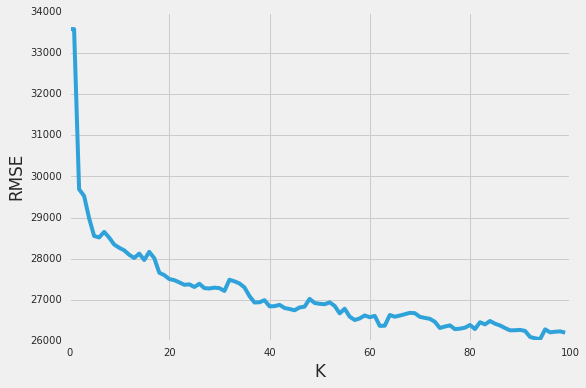

In [38]:
plt.style.use('fivethirtyeight')
x = list(k_rmses.keys())
y = list(k_rmses.values())
    
plt.plot(x,y)
plt.xlabel("K")
plt.ylabel('RMSE')

### Conclusion

In this training project, a linear regression method was used to train a system for predicting the value of a house based on available data about city Ames, Iowa, United States from 2006 to 2010..

In the tested approaches, the best RMSE was obtained equal to ***26041.28*** with k-fold cross validation on 94 folds.

## Continue...

*The model will improve with increasing knowledge*

For example, next we can find the outliers from different numeric columns, decrease the correlation using level or peek at solutions on the Kaggle.